# Bài tập 3: Face Dataset

In [1]:
# import libray
from sklearn.cluster import KMeans, DBSCAN, spectral_clustering
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
plt.gray()
%matplotlib inline

#### Import Dataset
    - Dataset gồm 13233 ảnh 62 x 47.
    - Đã được label với target gồm 5749 class. 
    - Mỗi class gồm ảnh của một người. 

In [2]:
faces = fetch_lfw_people()

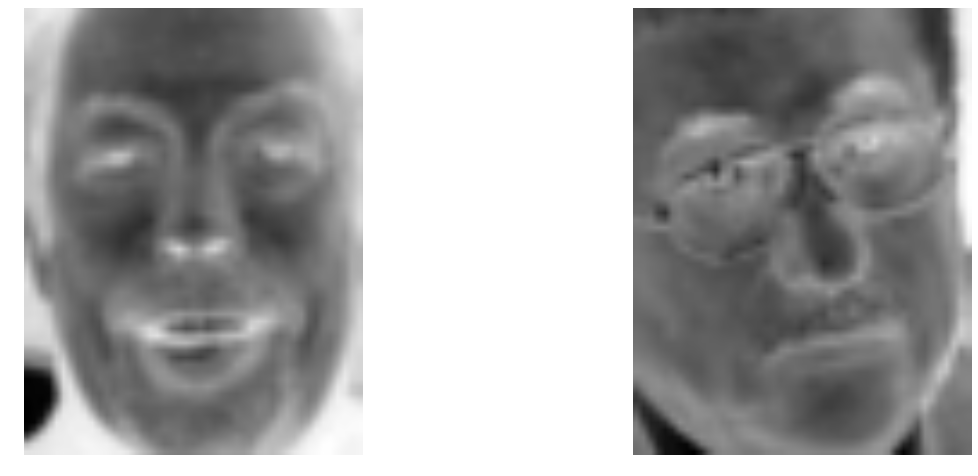

In [3]:
# create a fig to show image
fig = plt.figure(figsize=(20,8))

# for all 0-9 labels
for i in range(2):
    # initialize subplots in a grid 2x5 at i+1th position
    ax = fig.add_subplot(1, 2, 1+i)
    
    # display image
    ax.imshow(faces.images[i], cmap=plt.cm.binary)
    
    #don't show the axes
    plt.axis('off')

plt.show()

### Trích xuất đặc trưng

    - Sử dụng Local Binary Pattern. 
    - 
    

In [4]:
# import feature detector & descriptor library
from skimage.feature import local_binary_pattern

In [5]:
feature = local_binary_pattern(faces.images[0], P=8, R=0.5)

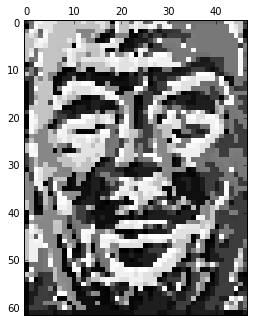

In [6]:
plt.matshow(feature)

In [7]:
print(feature)

[[  64.  112.  240. ...,  193.  193.   64.]
 [   0.  120.  249. ...,  227.  195.   64.]
 [ 134.  251.  225. ...,  243.  195.    0.]
 ..., 
 [   6.   30.   62. ...,  227.   64.  112.]
 [  14.   62.   62. ...,  195.   64.  120.]
 [   6.   30.   30. ...,    3.    4.   28.]]


In [8]:
import numpy as np


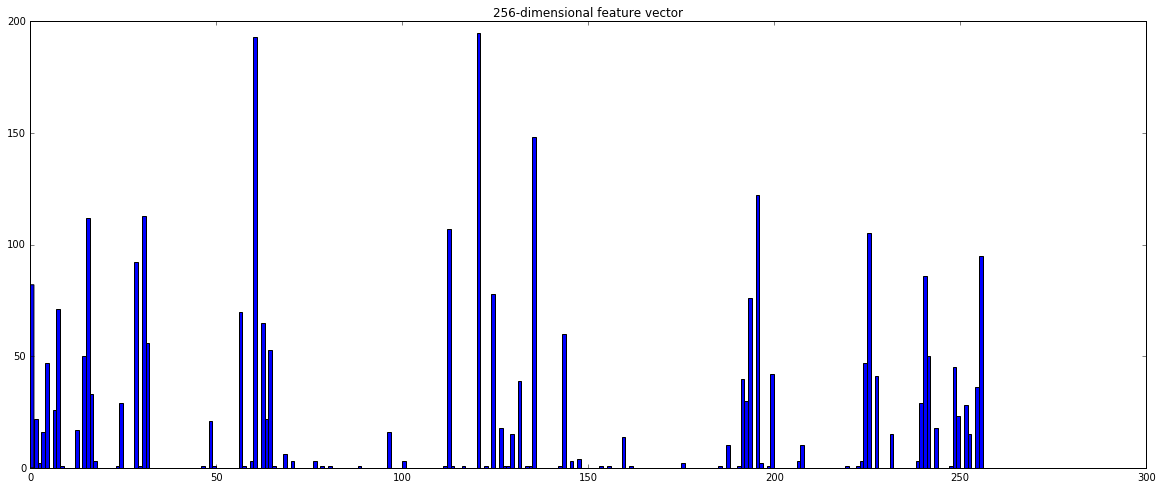

In [51]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)
ax.hist(feature.reshape(-1), bins=list(range(257)))
plt.title('256-dimensional feature vector')
plt.show()

### Trích xuất feature từ mỗi ảnh

In [10]:
def getLBP_feature(image):
    feature = local_binary_pattern(image, P=8, R=0.5)
    return np.histogram(feature, bins=list(range(257)))[0]

In [11]:
feature_LBP = list(map(getLBP_feature, faces.images))

In [12]:
print(type(feature_LBP))
print(' ', len(feature_LBP))

<class 'list'>
  13233


In [13]:
feature_LBP = np.array(feature_LBP)

In [14]:
type(feature_LBP)

numpy.ndarray

In [15]:
feature_LBP.shape

(13233, 256)

In [16]:
print(feature_LBP[0])

[ 82  22   2  16  47   0  26  71   1   0   0   0  17   0  50 112  33   3
   0   0   0   0   0   1  29   0   0   0  92   1 113  56   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   1   0  21   1   0   0   0   0
   0   0  70   1   0   3 193   0  65  22  53   1   0   0   6   0   3   0
   0   0   0   0   3   0   1   0   1   0   0   0   0   0   0   0   1   0
   0   0   0   0   0   0  16   0   0   0   3   0   0   0   0   0   0   0
   0   0   0   1 107   1   0   0   1   0   0   0 195   0   1   0  78   0
  18   1   1  15   0  39   0   1   1 148   0   0   0   0   0   0   1  60
   0   3   0   4   0   0   0   0   0   1   0   1   0   0   0  14   0   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
   0   0   0   0   0   1   0  10   0   0   1  40  30  76   0 122   2   0
   1  42   0   0   0   0   0   0   3  10   0   0   0   0   0   0   0   0
   0   0   0   1   0   0   1   3  47 105   0  41   0   0   0  15   0   0
   0   0   0   0   3  29  86  50   0  18   0   0   

### Áp dụng KMean trên dữ liệu feature

In [17]:
# import library
from sklearn.cluster import KMeans


In [18]:
model_kmean = KMeans(n_clusters=5749)

In [19]:
label_dbscan = model_kmean.fit_predict(feature_LBP)

In [20]:
print(label_dbscan)

[2951  394 2674 ..., 3643 2537 3980]


### Cross-table

In [21]:
# import library
import pandas as pd

In [22]:
df = pd.DataFrame({'label':label_dbscan, 'True Label':faces.target})
ct = pd.crosstab(df['label'], df['True Label'])
print(ct.tail(10))

True Label  0     1     2     3     4     5     6     7     8     9     ...   \
label                                                                   ...    
5739           0     0     0     0     0     0     0     0     0     0  ...    
5740           0     0     0     0     0     0     0     0     0     0  ...    
5741           0     0     0     0     0     0     0     0     0     0  ...    
5742           0     0     0     0     0     0     0     0     0     0  ...    
5743           0     0     0     0     0     0     0     0     0     0  ...    
5744           0     0     0     0     0     0     0     0     0     0  ...    
5745           0     0     0     0     0     0     0     0     0     0  ...    
5746           0     0     0     0     0     0     0     0     0     0  ...    
5747           0     0     0     0     0     0     0     0     0     0  ...    
5748           0     0     0     0     0     0     0     0     0     0  ...    

True Label  5739  5740  5741  5742  574

### Visualize by PCA

In [48]:
# import library
from sklearn.decomposition import PCA

In [189]:
ct.to_csv('crosstab', sep=',')

In [36]:
match_label = ct.idxmax(0)

In [37]:
type(match_label)

pandas.core.series.Series

In [45]:
sum(match_label.duplicated(False))

3523

- Nhận xét hiện tại: 
    - Kết quả trả về của KMean không hiệu quả. Khó phân biệt label đúng cho mỗi vùng. 

- Sử dụng PCA để giảm số chiều feature và tiến hành visualize kết quả

In [53]:
pca = PCA(n_components=2).fit_transform(feature_LBP)

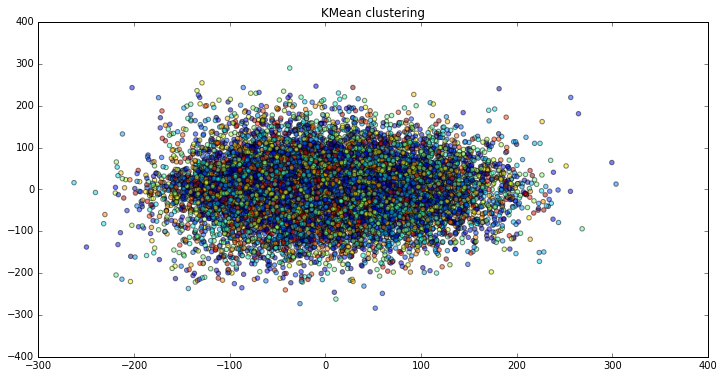

In [57]:
plt.figure(figsize=(12,6))
plt.scatter(pca[:,0], pca[:,1], c=label_dbscan, alpha=0.5,cmap='jet')
plt.title('KMean clustering')
plt.show()

#### Visualize by t-SNE

In [60]:
from sklearn.manifold import TSNE

TSNE_model = TSNE(learning_rate=100)

tnse = TSNE_model.fit_transform(feature_LBP)

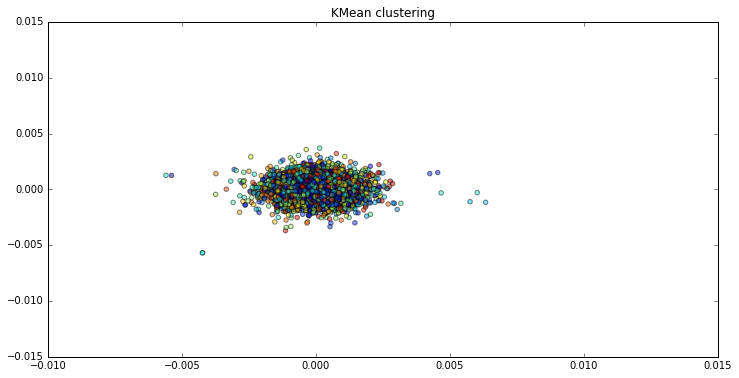

In [61]:
plt.figure(figsize=(12,6))
plt.scatter(tnse[:,0], tnse[:,1], c=label_dbscan, alpha=0.5,cmap='jet')
plt.title('KMean clustering')
plt.show()